# ANALIZAR LA INFORMACION DE PRODUCCION LOS DATOS RELEVANTES
SON HORAS TRABAJADAS Y LA PRODUCCION, LA VARIABLE X ES HORAS TRABAJADAS Y LA VARIABEL Y ES LA PRODUCCION
QUE DESEAMOS OBTENER:
- GRAFICA CON DISPERCION DE PUNTOS LINEAL
- COEFICIENTE DE CORRELACION
- COEFICIENTE DE DETERMINACION
- LA ECUACION DE LA RECTA DE REGREACION
- PRONOSTICAR CON 60 HORAS TRABAJADAS CUANTA PRODUCCION HABRA


In [22]:
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [23]:
df = pd.read_excel("../2 Extras/Regresion Lineal/datos_produccion.xlsx")
print(df.head())
df.shape

   Semana  Horas Trabajadas  Horas Descanso  Productos Terminados
0       1                42               2             28.925481
1       2                45               3             30.570058
2       3                30               2             21.132880
3       4                33               2             21.798530
4       5                33               3             19.343444


(50, 4)

In [24]:
variable_x='Horas Trabajadas'
variable_y='Productos Terminados'
print(variable_x," - ", variable_y)

Horas Trabajadas  -  Productos Terminados


In [25]:
#generar analisis la ecuacion de la recta
modelo = LinearRegression()
modelo.fit(df[[variable_x]], df[variable_y])
print("Coeficiente: ",round(modelo.coef_[0],4), "x + ",round(modelo.intercept_,4))


Coeficiente:  0.4941 x +  5.1664


In [26]:
#coeficiente de correlacion
print("Coeficiente de correlacion: ",round(np.corrcoef(df[variable_x],df[variable_y])[0,1],4))

Coeficiente de correlacion:  0.889


In [27]:
#coeficiente de determinacion
print("Coeficiente de determinacion: ",round(r2_score(df[variable_y],modelo.predict(df[[variable_x]])),4))

Coeficiente de determinacion:  0.7903


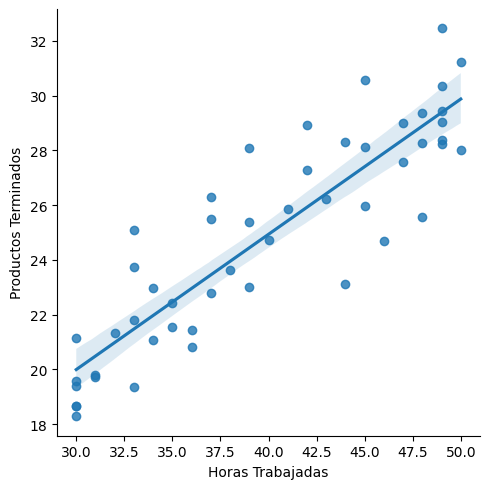

In [28]:
#grafica de dispercion con itervalo del 95%
sns.lmplot(x=variable_x, y=variable_y, data=df, ci=95)

<Axes: xlabel='Horas Trabajadas', ylabel='Productos Terminados'>

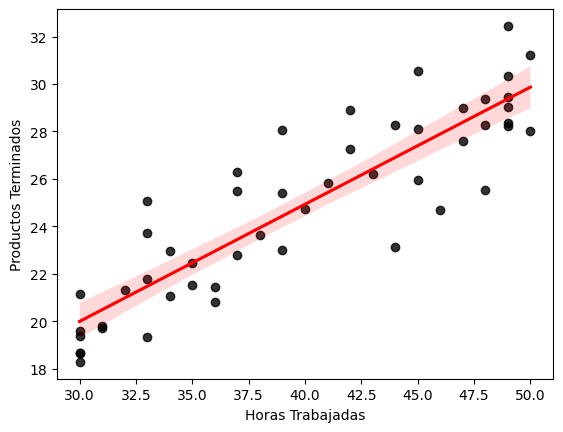

In [32]:
sns.regplot(x=df[variable_x], y=df[variable_y], ci=95, line_kws={'color':'red'}, scatter_kws={'color':'black'})

In [35]:
#generar prediccion
dato_predecir = 60
horas_trabajadas_nuevas=pd.DataFrame([dato_predecir], columns=[variable_x])
autos_producidos_prediccion=modelo.predict(horas_trabajadas_nuevas)
print("La prediccion de autos producidos para",horas_trabajadas_nuevas.iloc[0,0],"horas trabajadas es de",round(autos_producidos_prediccion[0],2))

La prediccion de autos producidos para 60 horas trabajadas es de 34.81
